In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib.colors import LogNorm
import matplotlib as mpl

# Model result load-in

In [2]:
df_ngb = pd.read_csv("tables_for_analysis/NGBooster_result.csv")
df_ngb.head()

,Unnamed: 0,actual_dele,pred_e,error_e,actual_delsini,pred_inc,error_inc,Des'n,e,Incl.,propa,prope,prope_h,propsini,propsini_h,da,dsini,de
0,0,0.000067,-0.025266,0.006537,-0.002757,-0.003580,0.000529,h2457,0.023071,5.98580,2.737673,0.023138,0.015653,0.101525,0.050919,2.000000e-08,0.001200,0.005300
1,1,-0.006115,-0.006326,0.001611,-0.013262,-0.012585,0.000565,K17Q48R,0.180419,12.42983,2.697389,0.174304,0.185447,0.201982,0.105127,2.900000e-07,0.000002,0.000015
2,2,0.027774,0.030305,0.002686,0.023242,0.024883,0.000680,v9954,0.191661,9.62640,2.677371,0.219435,0.236699,0.190465,0.085482,5.900000e-06,0.000054,0.000110
3,3,-0.041527,-0.038532,0.001591,-0.018113,-0.017975,0.000304,K17P54P,0.175703,5.61772,3.140491,0.134176,0.133146,0.079778,0.043310,1.600000e-05,0.000006,0.000013
4,4,-0.038788,-0.051091,0.002846,-0.003989,-0.003722,0.000762,O8107,0.262128,6.03518,2.224343,0.223340,0.211611,0.101150,0.045614,9.700000e-03,0.001800,0.005600


In [4]:
# Proper elements after NGBoost Model prediction
pred_e = df_ngb["pred_e"] + df_ngb["e"]
pred_sini = df_ngb["pred_inc"] + np.sin((df_ngb["Incl."] * np.pi/180))

# Proper elements after integration
prope = df_ngb["prope"]
propsini = df_ngb["propsini"]

# Proper elements after Linear prediction
linear_e = df_ngb["prope_h"]
linear_sini = df_ngb["propsini_h"]

# Osculating elements
e = df_ngb["e"]
sini = np.sin(df_ngb["Incl."] * np.pi/180)

In [5]:
print(df_ngb[["pred_e", "e", "pred_inc", "Incl.", "prope", "propsini", "prope_h", "propsini_h"]].isna().sum())

pred_e        0
e             0
pred_inc      0
Incl.         0
prope         0
propsini      0
prope_h       0
propsini_h    0
dtype: int64


In [6]:
rms_nesvorny_vs_osculating_e = np.sqrt(np.median((prope - e)**2))
prope[2] - e[2]

np.float64(0.027774400000000005)

# RMS calculation

In [7]:
# RMS calculations
rms_nesvorny_vs_osculating_e = np.sqrt(np.median((prope - e)**2))
rms_nesvorny_vs_osculating_sini = np.sqrt(np.median((propsini - sini)**2))

rms_nesvorny_vs_linear_e = np.sqrt(np.median((prope - linear_e)**2))
rms_nesvorny_vs_linear_sini = np.sqrt(np.median((propsini - linear_sini)**2))

rms_nesvorny_vs_ngboost_e = np.sqrt(np.median((prope - pred_e)**2))
rms_nesvorny_vs_ngboost_sini = np.sqrt(np.median((propsini - pred_sini)**2))

# RMS improvement calculations
improvement_ngboost_vs_linear_e = ((rms_nesvorny_vs_linear_e - rms_nesvorny_vs_ngboost_e) / rms_nesvorny_vs_linear_e) * 100
improvement_ngboost_vs_linear_sini = ((rms_nesvorny_vs_linear_sini - rms_nesvorny_vs_ngboost_sini) / rms_nesvorny_vs_linear_sini) * 100

improvement_ngboost_vs_osculating_e = ((rms_nesvorny_vs_osculating_e - rms_nesvorny_vs_ngboost_e) / rms_nesvorny_vs_osculating_e) * 100
improvement_ngboost_vs_osculating_sini = ((rms_nesvorny_vs_osculating_sini - rms_nesvorny_vs_ngboost_sini) / rms_nesvorny_vs_osculating_sini) * 100

# Results dictionary
results = {
    'rms_nesvorny_vs_osculating_e': rms_nesvorny_vs_osculating_e,
    'rms_nesvorny_vs_osculating_sini': rms_nesvorny_vs_osculating_sini,
    'rms_nesvorny_vs_linear_e': rms_nesvorny_vs_linear_e,
    'rms_nesvorny_vs_linear_sini': rms_nesvorny_vs_linear_sini,
    'rms_nesvorny_vs_ngboost_e': rms_nesvorny_vs_ngboost_e,
    'rms_nesvorny_vs_ngboost_sini': rms_nesvorny_vs_ngboost_sini,
    'improvement_ngboost_vs_linear_e_percent': improvement_ngboost_vs_linear_e,
    'improvement_ngboost_vs_linear_sini_percent': improvement_ngboost_vs_linear_sini,
    'improvement_ngboost_vs_osculating_e_percent': improvement_ngboost_vs_osculating_e,
    'improvement_ngboost_vs_osculating_sini_percent': improvement_ngboost_vs_osculating_sini
}

results

{'rms_nesvorny_vs_osculating_e': np.float64(0.027027100000184982),
 'rms_nesvorny_vs_osculating_sini': np.float64(0.01214036625532456),
 'rms_nesvorny_vs_linear_e': np.float64(0.008746797959944408),
 'rms_nesvorny_vs_linear_sini': np.float64(0.06857719364872865),
 'rms_nesvorny_vs_ngboost_e': np.float64(0.002149469365482754),
 'rms_nesvorny_vs_ngboost_sini': np.float64(0.0004666018073843978),
 'improvement_ngboost_vs_linear_e_percent': np.float64(75.4256429001086),
 'improvement_ngboost_vs_linear_sini_percent': np.float64(99.3195962351938),
 'improvement_ngboost_vs_osculating_e_percent': np.float64(92.04698482090923),
 'improvement_ngboost_vs_osculating_sini_percent': np.float64(96.15660847810292)}

# Plot Generation

## Comparison between Osculating, Linear Prediction, and Model Prediction

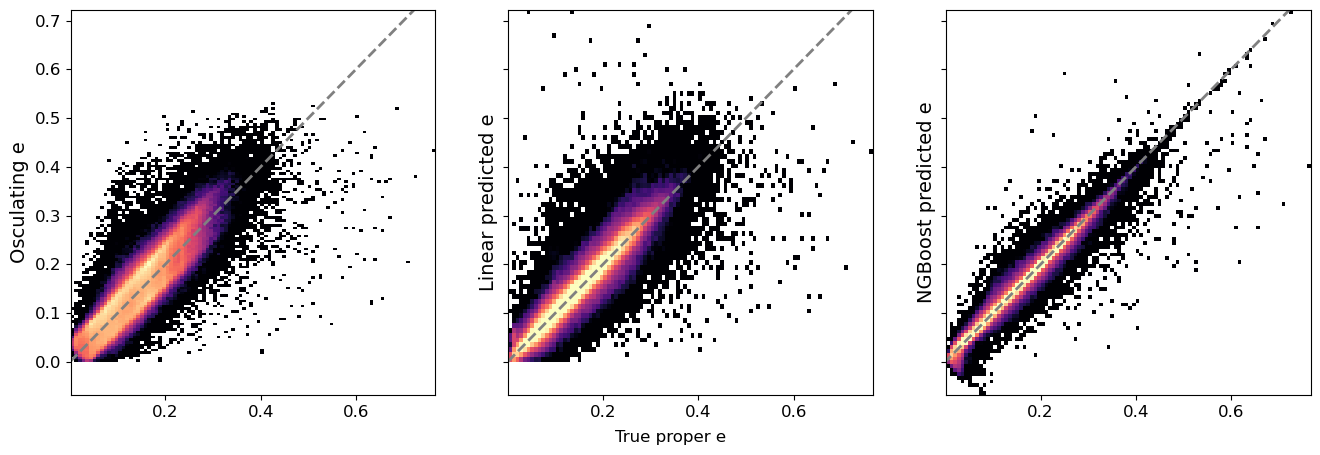

In [8]:
df_combined = pd.DataFrame({
	'propa': df_ngb['propa'],
	'e': df_ngb['e'], 
	'true_e': df_ngb['prope'],
	'linear_e': df_ngb['prope_h'],
	'ngb_e': df_ngb['pred_e'] + df_ngb['e'],
})

fig, axs = plt.subplots(1, 3, figsize=(16, 5), sharex=True, sharey=True)
bins = 100
vmin = 10
cmap = mpl.cm.magma
norm = LogNorm(vmin=vmin)

data = [
	(df_combined['true_e'], df_combined['e'], "Osculating"),
	(df_combined['true_e'], df_combined['linear_e'], "Linear"),
	(df_combined['true_e'], df_combined['ngb_e'], "NGB model"),
]

for i, (x, y, label) in enumerate(data):
	ax = axs[i]
	x = x[(x <= 1) & (y <= 1)]
	y = y[(x <= 1) & (y <= 1)]
	h = ax.hist2d(x, y, bins=bins, norm=norm, cmap=cmap)

	minval = min(x.min(), y.min())
	maxval = max(x.max(), y.max())
	ax.plot([minval, maxval], [minval, maxval], ls = 'dashed', linewidth=2, color = "grey")
	
	if i == 0:
		ax.set_ylabel("Osculating e", fontsize=14)
	elif i == 1:
		ax.set_ylabel("Linear predicted e", fontsize=14)
	else:
		ax.set_ylabel("NGBoost predicted e", fontsize=14)

	ax.tick_params(axis='both', labelsize=12)
	h_vals, xedges, yedges = np.histogram2d(x, y, bins=bins)
	X, Y = np.meshgrid((xedges[:-1] + xedges[1:])/2, (yedges[:-1] + yedges[1:])/2)

fig.supxlabel("True proper e")
plt.show()

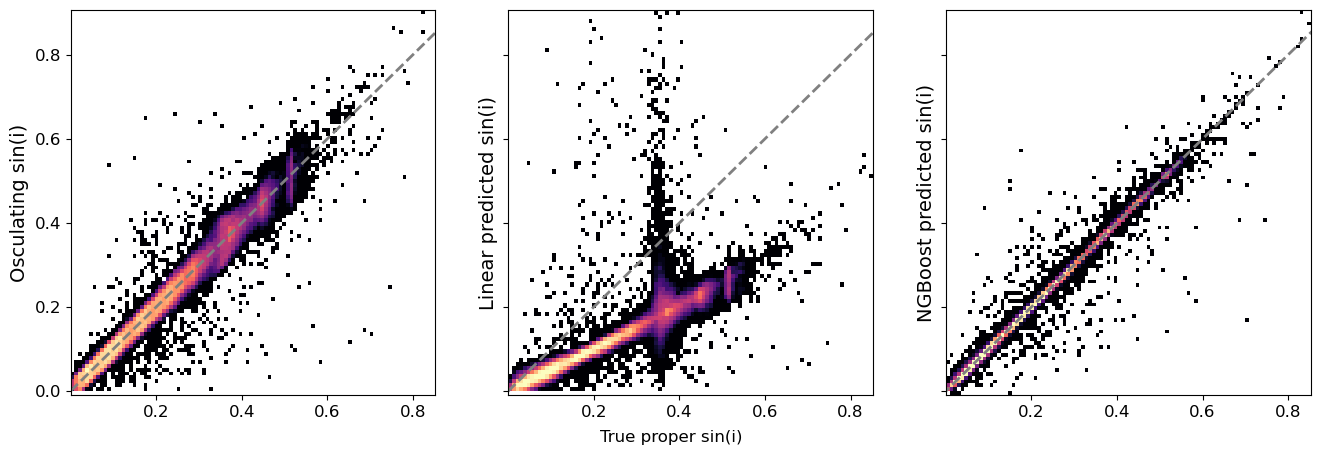

In [9]:
df_combined = pd.DataFrame({
	'propa': df_ngb['propa'],
	'sini': np.sin(df_ngb['Incl.'] * np.pi/180), 
	'true_sini': df_ngb['propsini'],
	'linear_sini': df_ngb['propsini_h'],
	'ngb_sini': df_ngb['pred_inc'] + np.sin(df_ngb['Incl.'] * np.pi/180)
})

fig, axs = plt.subplots(1, 3, figsize=(16, 5), sharex=True, sharey=True)
bins = 100
vmin = 10
cmap = mpl.cm.magma
norm = LogNorm(vmin=vmin)

data = [
	(df_combined['true_sini'], df_combined['sini'], "Osculating"),
	(df_combined['true_sini'], df_combined['linear_sini'], "Linear"),
	(df_combined['true_sini'], df_combined['ngb_sini'], "NGB model"),
]

for i, (x, y, label) in enumerate(data):
	ax = axs[i]
	x = x[(x <= 1) & (y <= 1)]
	y = y[(x <= 1) & (y <= 1)]
	h = ax.hist2d(x, y, bins=bins, norm=norm, cmap=cmap)

	minval = min(x.min(), y.min())
	maxval = max(x.max(), y.max())
	ax.plot([minval, maxval], [minval, maxval], ls = 'dashed', linewidth=2, color = "grey")
	
	if i == 0:
		ax.set_ylabel("Osculating sin(i)", fontsize=14)
	elif i == 1:
		ax.set_ylabel("Linear predicted sin(i)", fontsize=14)
	else:
		ax.set_ylabel("NGBoost predicted sin(i)", fontsize=14)

	ax.tick_params(axis='both', labelsize=12)
	h_vals, xedges, yedges = np.histogram2d(x, y, bins=bins)
	X, Y = np.meshgrid((xedges[:-1] + xedges[1:])/2, (yedges[:-1] + yedges[1:])/2)

fig.supxlabel("True proper sin(i)")
plt.show()

## Nesvorny Plots replicate

In [10]:
# Define sample with high errors

def calculate_d(a_p, delta_a_p, delta_e_p, delta_sin_i_p):
	numerator = 3e4  # 3 × 10^4 m/s
	denominator = math.sqrt(a_p)
	term1 = (delta_a_p / a_p) ** 2
	term2 = 2 * (delta_e_p ** 2)
	term3 = 2 * (delta_sin_i_p ** 2)
	inside_sqrt = (5 / 4) * term1 + term2 + term3
	d = (numerator / denominator) * math.sqrt(inside_sqrt)
	return d

df_ngb['d'] = df_ngb.apply(lambda row: calculate_d(row['propa'], row['da'], row['de'], row['dsini']), axis = 1)
df_ngb_high = df_ngb[df_ngb['d'] > 100]

In [11]:
# MMR a values
a_jupiter = 5.204
a_mars = 1.524

resonances = {
	"3:1": ("Jupiter", 3, 1),
	"12:5": ("Jupiter", 12, 5),
	"13:5": ("Jupiter", 13, 5),
	"9:4": ("Jupiter", 9, 4),
	"11:5": ("Jupiter", 11, 5),
	"2:1": ("Jupiter", 2, 1),
	"1:2": ("Mars", 1, 2),
	"7:2": ("Jupiter", 7, 2),
	"4:7": ("Mars", 4, 7)
}

# Function to calculate semi-major axis for a resonance
def compute_resonance_axis(p, q, a_primary):
	return a_primary * (q / p) ** (2/3)

# Store results
a_values = {}
for label, (planet, p, q) in resonances.items():
	if planet == "Jupiter":
		a = compute_resonance_axis(p, q, a_jupiter)
		a_values[label] = a
	else:
		a = compute_resonance_axis(p, q, a_mars)
		a_values[label] = a
a_values["5:2:2"] = 3.17
print(a_values)

{'3:1': 2.501822254626584, '12:5': 2.903107560189675, '13:5': 2.752253224713012, '9:4': 3.030741825658466, '11:5': 3.076489949733917, '2:1': 3.27831457182646, '1:2': 2.4191992031995357, '7:2': 2.257487001377278, '4:7': 2.2131473644877713, '5:2:2': 3.17}


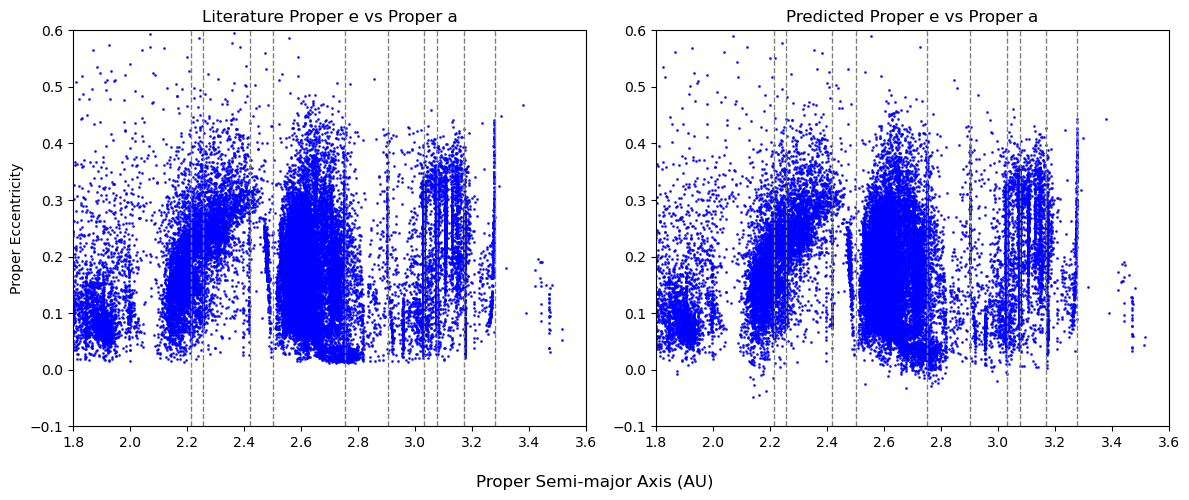

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharex=True)

# Left Plot: Literature published proper a vs proper e
axs[0].scatter(
    df_ngb_high["propa"],
    df_ngb_high["prope"],
    alpha=0.8,
    s=1,
    color='blue',
    label="Original"
)
axs[0].set_ylabel("Proper Eccentricity")
axs[0].set_xlim(1.8, 3.6)
axs[0].set_ylim(-0.1, 0.6)
axs[0].set_title("Literature Proper e vs Proper a")

# Right Plot: Model predicted proper a vs proper e
y = df_ngb_high["pred_e"] + df_ngb_high["e"]
axs[1].scatter(
    df_ngb_high["propa"],
    y,
    alpha=0.8,
    s=1,
    color='blue',
    label="NGB prediction"
)
axs[1].set_xlim(1.8, 3.6)
axs[1].set_ylim(-0.1, 0.6)
axs[1].set_title("Predicted Proper e vs Proper a")

for ax in axs:
    for label, a in a_values.items():
        ax.axvline(a, linestyle='--', linewidth=1, color='grey')

fig.supxlabel("Proper Semi-major Axis (AU)")
plt.tight_layout()
plt.show()


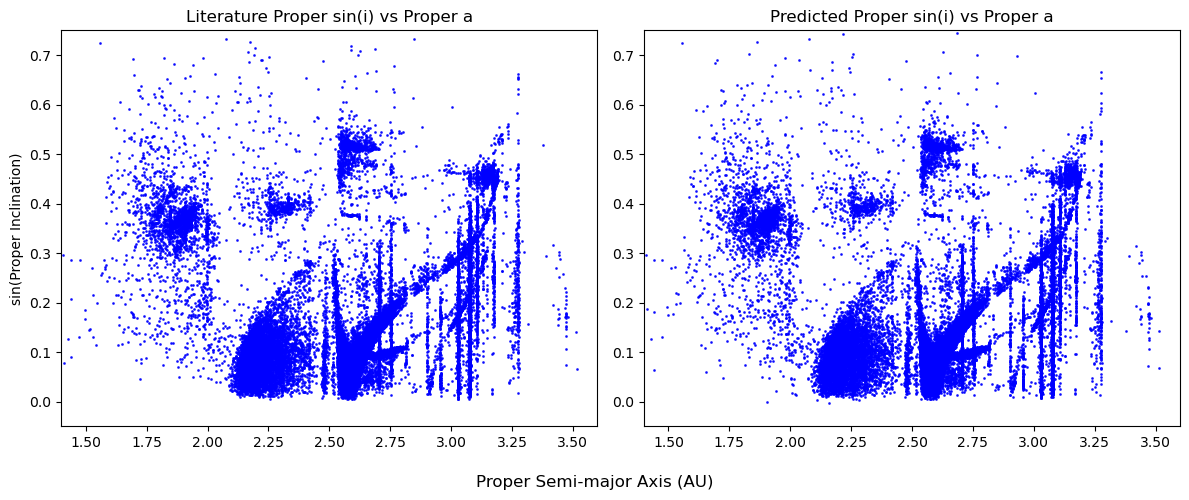

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharex=True)

# Left Plot: Literature published proper a vs proper e
axs[0].scatter(
    df_ngb_high["propa"],
    df_ngb_high["propsini"],
    alpha=0.8,
    s=1,
    color='blue',
)

axs[0].set_ylabel("sin(Proper Inclination)")
axs[0].set_xlim(1.4, 3.6)
axs[0].set_ylim(-0.05, 0.75)
axs[0].set_title("Literature Proper sin(i) vs Proper a")

# Right Plot: Model predicted proper a vs proper e
y = df_ngb_high["pred_inc"] + np.sin((df_ngb_high["Incl."] * np.pi/180))
axs[1].scatter(
    df_ngb_high["propa"],
    y,
    alpha=0.8,
    s=1,
    color='blue',
)

axs[1].set_xlim(1.4, 3.6)
axs[1].set_ylim(-0.05, 0.75)
axs[1].set_title("Predicted Proper sin(i) vs Proper a")

fig.supxlabel("Proper Semi-major Axis (AU)")
plt.tight_layout()
plt.show()

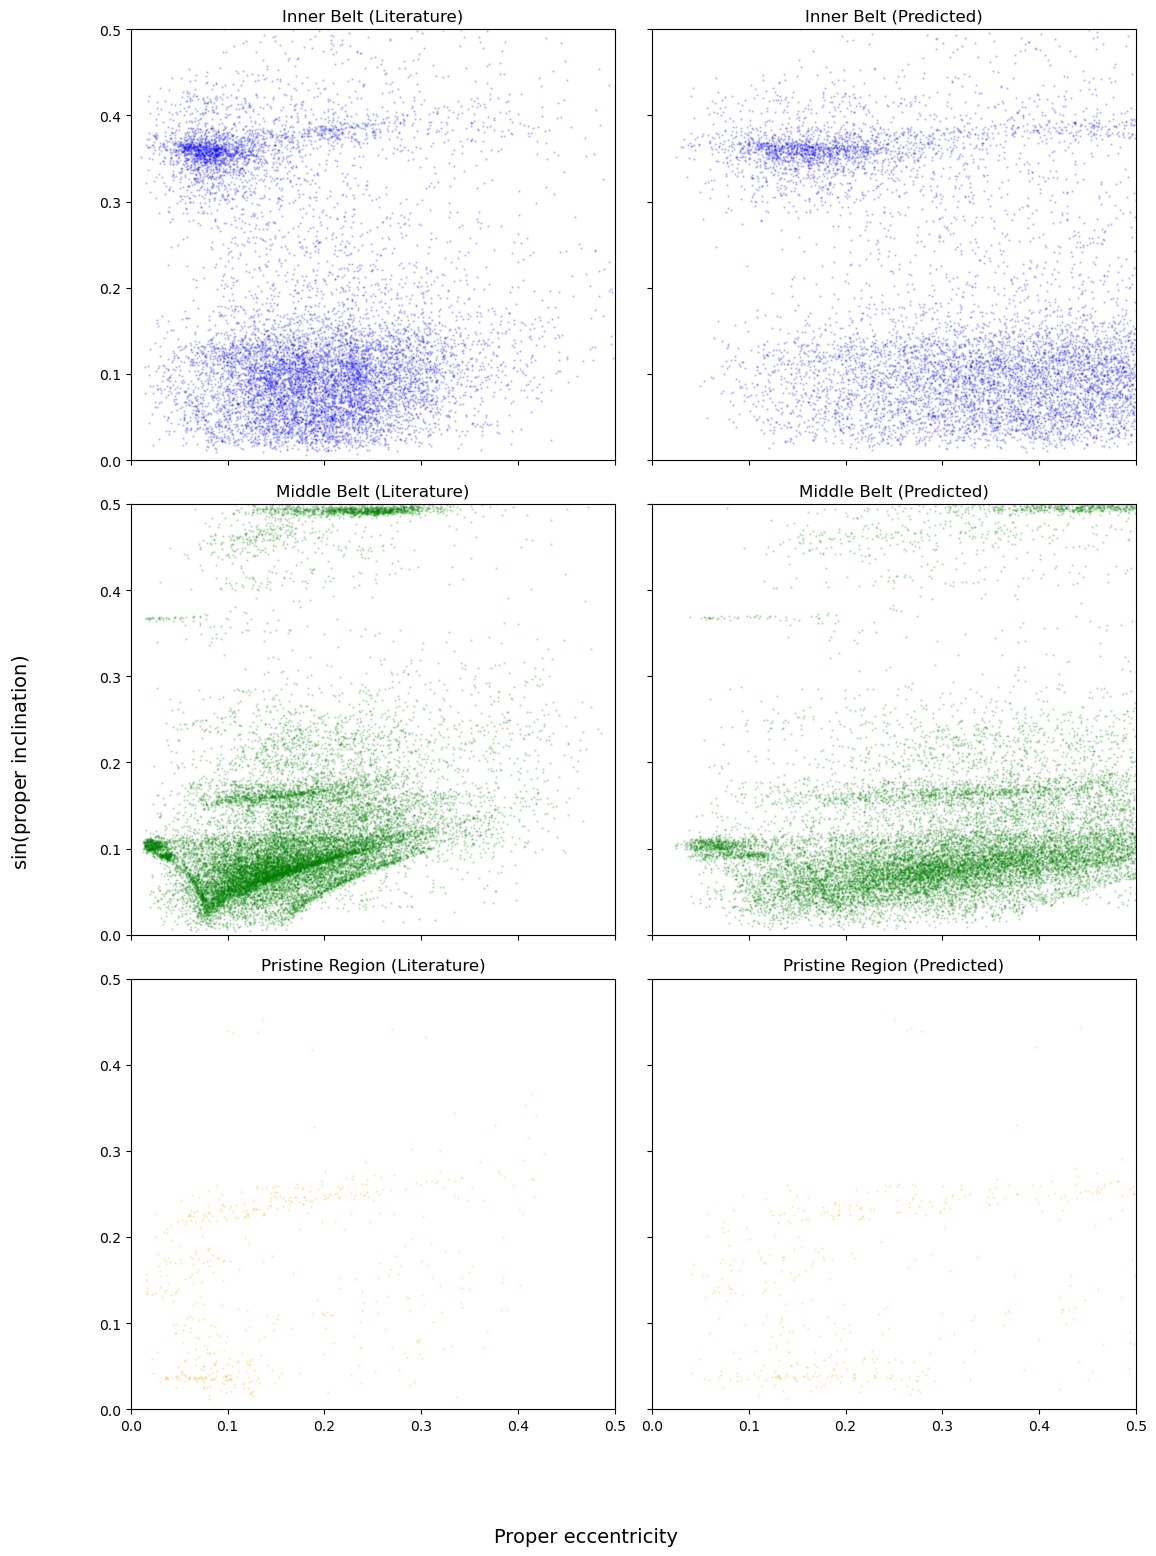

In [14]:
import matplotlib.pyplot as plt
import numpy as np

inner_belt_df = df_ngb_high[df_ngb_high["propa"] < 2.5]
middle_belt_df = df_ngb_high[(df_ngb_high["propa"] > 2.5) & (df_ngb_high["propa"] < 2.825)]
pristine_df = df_ngb_high[(df_ngb_high["propa"] > 2.825) & (df_ngb_high["propa"] < 2.958)]

fig, ax = plt.subplots(3, 2, figsize=(12, 16), sharex=True, sharey=True)

linear_sin_i_inner = np.sin(inner_belt_df["propsini"])
linear_prope_inner = inner_belt_df["prope"]
ax[0, 0].scatter(linear_prope_inner, linear_sin_i_inner, s=0.5, alpha=0.2, color='blue')
ax[0, 0].set_title("Inner Belt (Literature)")

linear_sin_i_middle = np.sin(middle_belt_df["propsini"])
linear_prope_middle = middle_belt_df["prope"]
ax[1, 0].scatter(linear_prope_middle, linear_sin_i_middle, s=0.5, alpha=0.2, color='green')
ax[1, 0].set_title("Middle Belt (Literature)")

linear_sin_i_pristine = np.sin(pristine_df["propsini"])
linear_prope_pristine = pristine_df["prope"]
ax[2, 0].scatter(linear_prope_pristine, linear_sin_i_pristine, s=0.5, alpha=0.2, color='orange')
ax[2, 0].set_title("Pristine Region (Literature)")

linear_sin_i_inner_mod = np.sin(inner_belt_df["propsini"] + np.sin(inner_belt_df["e"] * np.pi / 180))
linear_prope_inner_mod = inner_belt_df["prope"] + inner_belt_df["e"]
ax[0, 1].scatter(linear_prope_inner_mod, linear_sin_i_inner_mod, s=0.5, alpha=0.2, color='blue')
ax[0, 1].set_title("Inner Belt (Predicted)")

linear_sin_i_middle_mod = np.sin(middle_belt_df["propsini"] + np.sin(middle_belt_df["e"] * np.pi / 180))
linear_prope_middle_mod = middle_belt_df["prope"] + middle_belt_df["e"]
ax[1, 1].scatter(linear_prope_middle_mod, linear_sin_i_middle_mod, s=0.5, alpha=0.2, color='green')
ax[1, 1].set_title("Middle Belt (Predicted)")

linear_sin_i_pristine_mod = np.sin(pristine_df["propsini"] + np.sin(pristine_df["e"] * np.pi / 180))
linear_prope_pristine_mod = pristine_df["prope"] + pristine_df["e"]
ax[2, 1].scatter(linear_prope_pristine_mod, linear_sin_i_pristine_mod, s=0.5, alpha=0.2, color='orange')
ax[2, 1].set_title("Pristine Region (Predicted)")

for row in ax:
    for axis in row:
        axis.set_xlim(0, 0.5)
        axis.set_ylim(0, 0.5)

fig.supxlabel("Proper eccentricity", fontsize=14)
fig.supylabel(r"$\sin(\mathrm{proper\ inclination})$", fontsize=14)

plt.tight_layout(rect=[0.05, 0.05, 0.98, 0.98])
plt.show()


Text(0.5, 1.0, 'Predicted Proper e vs Proper a')

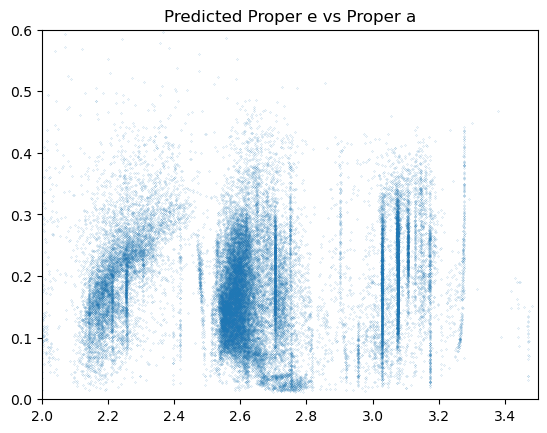

In [ ]:

# Right Plot: Model predicted proper a vs proper e
y = df_ngb_high["pred_e"] + df_ngb_high["e"]
plt.scatter(
    df_ngb_high["propa"],
    y,
    # df_ngb_high["prope"],
    s=0.01,
)
plt.xlim(2, 3.5)
plt.ylim(0, 0.6)
plt.title("Predicted Proper e vs Proper a")